# **Cats and Dogs Classification**
*Classifying whether a given image is of a cat or a dog using Convolution Neural Network (CNN)*

*Dataset Link: https://www.kaggle.com/tongpython/cat-and-dog*

In [1]:
# Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Part 1 - Data Preprocessing

In [2]:
# Importing essential libraries
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
# Preprocessing the Training set

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Importing Training set
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/training_set/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [8]:
# Preprocessing the Test set

# Feature Scaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Importing Test set
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/test_set/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2023 images belonging to 2 classes.


## Part 2 - Building the CNN

In [0]:
# Importing essential libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [0]:
# Initialising the CNN
cnn = Sequential()

In [0]:
# Step 1 - Add Convolution Layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [0]:
# Step 2 - Add Pooling Layer
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [0]:
# Add second onvolutional layer with pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [0]:
# Step 3 - Add Flattening Layer
cnn.add(Flatten())

In [0]:
# Step 4 - Add Full Connected Layer
cnn.add(Dense(units=128, activation='relu'))

In [0]:
# Step 5 - Add Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

## Part 3 - Training the CNN

In [0]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Training the CNN on the Training set and evaluating it on the Test set
model_history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 2526s 10s/step - loss: 0.6795 - accuracy: 0.5703 - val_loss: 0.5574 - val_accuracy: 0.6451
Epoch 2/25
251/251 [==============================] - 78s 311ms/step - loss: 0.6131 - accuracy: 0.6618 - val_loss: 0.4782 - val_accuracy: 0.7049
Epoch 3/25
251/251 [==============================] - 77s 308ms/step - loss: 0.5606 - accuracy: 0.7118 - val_loss: 0.3729 - val_accuracy: 0.7301
Epoch 4/25
251/251 [==============================] - 77s 308ms/step - loss: 0.5209 - accuracy: 0.7413 - val_loss: 0.8297 - val_accuracy: 0.7533
Epoch 5/25
251/251 [==============================] - 77s 308ms/step - loss: 0.4981 - accuracy: 0.7598 - val_loss: 1.1881 - val_accuracy: 0.7405
Epoch 6/25
251/251 [==============================] - 78s 311ms/step - loss: 0.4823 - accuracy: 0.7700 - val_loss: 0.2775 - val_accuracy: 0.7548
Epoch 7/25
251/251 [==============================] - 77s 308ms/step - loss: 0.4676 - accuracy: 0.7734 - val_loss: 0.4126 - val_ac

## Part 4 - Model Evaluation

In [21]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# List all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


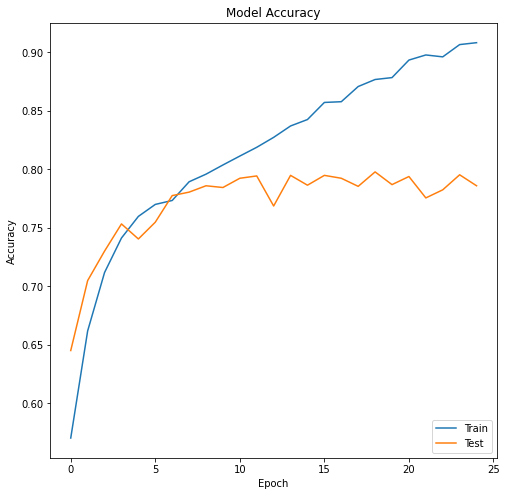

In [23]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

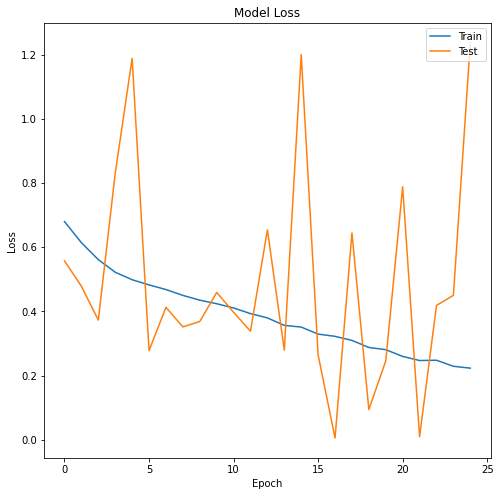

In [24]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Part 5 - Making Predictions

In [0]:
# Importing essential libraries
import numpy as np
from keras.preprocessing import image

### Prediction 1

*Predicting the following image:*

<img src='https://drive.google.com/uc?id=1eTA9tOoKb0OJwVUhQKB68QiuzWlAGUQA' width='400px' height='300px'/>

In [26]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/catordog1.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Cat's image.


### Prediction 2

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1FxykYvoG5x2ob0uZClJAMv6006fz3Unf" width="450px" height="300px"/>

In [27]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/catordog3.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


### Prediction 3

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1heVtXw_DN4iNhe17sWYbXFz4OEryo0l9" width="450px" height="300px"/>

In [28]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/catordog2.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.


### Prediction 4

*Predicting the following image:*

<img src="https://drive.google.com/uc?id=1zJ8yiKX1MFTYvGdMfWCPOG351E5hyEEX" width="450px" height="400px"/>

In [29]:
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/catordog4.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0][0] == 1:
  print("Prediction: It's a Dog's image.")
else:
  print("Prediction: It's a Cat's image.")

Prediction: It's a Dog's image.
